In [59]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
df = pd.read_csv("./dataset/bankloan.csv")
df = df.dropna()
df.isna().any()
df = df.drop(['Loan_ID'],axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [61]:
pre_X = df.drop(['Loan_Status'],axis=1)
pre_y = df['Loan_Status']
dm_X = pd.get_dummies(pre_X,dtype=int)
dm_y = pre_y.map(dict(Y=1,N=0))

In [62]:
dm_X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1


In [63]:
dm_X.dtypes

Dependents                 float64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                   int32
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                int32
Gender_Male                  int32
Married_No                   int32
Married_Yes                  int32
Education_Graduate           int32
Education_Not Graduate       int32
Self_Employed_No             int32
Self_Employed_Yes            int32
Property_Area_Rural          int32
Property_Area_Semiurban      int32
Property_Area_Urban          int32
dtype: object

In [64]:
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [65]:
smote = SMOTE()
X1,y = smote.fit_resample(dm_X,dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [66]:
Counter(y)

Counter({0: 332, 1: 332})

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2,shuffle=True)

In [83]:
classifier = Sequential()
classifier.add(Dense(units=400, kernel_initializer='random_normal',activation='relu',input_dim=X_test.shape[1]))
classifier.add(Dense(units=400, kernel_initializer='random_normal',activation='relu'))
classifier.add(Dense(units=4, kernel_initializer='random_normal',activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='random_normal', activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=20,epochs=100,verbose=1)
eval_model=classifier.evaluate(X_train, y_train)
eval_model

Epoch 1/100
27/27 [==============================] - 2s 5ms/step - loss: 0.6886 - accuracy: 0.5028
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6549 - accuracy: 0.6271
Epoch 3/100
27/27 [==============================] - 0s 8ms/step - loss: 0.5667 - accuracy: 0.7665
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8023
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8249
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.3974 - accuracy: 0.8362
Epoch 7/100
27/27 [==============================] - 0s 9ms/step - loss: 0.3784 - accuracy: 0.8456
Epoch 8/100
27/27 [==============================] - 0s 7ms/step - loss: 0.3618 - accuracy: 0.8437
Epoch 9/100
27/27 [==============================] - 0s 6ms/step - loss: 0.3590 - accuracy: 0.8475
Epoch 10/100
27/27 [==============================] - 0s 6ms/step - loss: 0.3474 - accuracy: 0.8625
Epoch 11/

[0.19021625816822052, 0.9209039807319641]

In [90]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.52)

5/5 [==============================] - 0s 3ms/step


Test Data Accuracy :81.20%


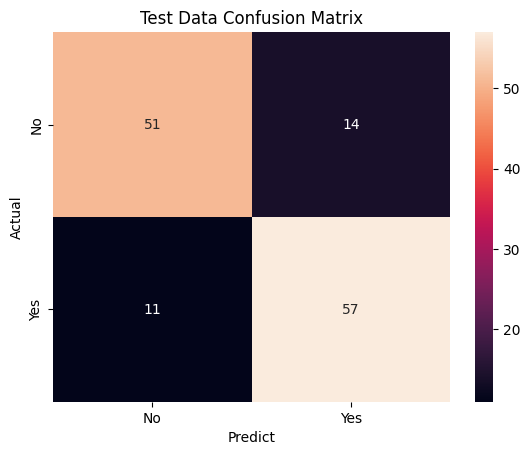

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
a = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d",ax=a)

a.set_title('Test Data Confusion Matrix')
a.set_xlabel('Predict')
a.set_ylabel('Actual')
a.xaxis.set_ticklabels(['No','Yes'])
a.yaxis.set_ticklabels(['No','Yes'])
print('Test Data Accuracy :{0:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

In [92]:
import pickle
pickle.dump(classifier, open('model.pkl','wb'))